### Import

In [3]:
import os
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import librosa
import soundfile as sf
from sklearn.decomposition import FastICA, PCA
from scipy import fft
from scipy import ifft
from scipy.signal import find_peaks
from matplotlib import cm
from tqdm import tqdm
from scipy.fft import irfft, rfft, rfftfreq

### Fonts

In [4]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Parameters

In [5]:
no_components = 6

### Directiories

In [6]:
orientation_dir = '../../data/audio/ica/orientations_voice_and_background/'
locations_dir_1 = '../../data/audio/ica/locations_voice_and_background/'
locations_dir_2 = '../../data/audio/ica/locations_voice_only/'

### Plot Graphs of locations and directions

FileNotFoundError: [Errno 2] No such file or directory: '../../assets/matplotlib/018_ICA_voice_seperation_1.png'

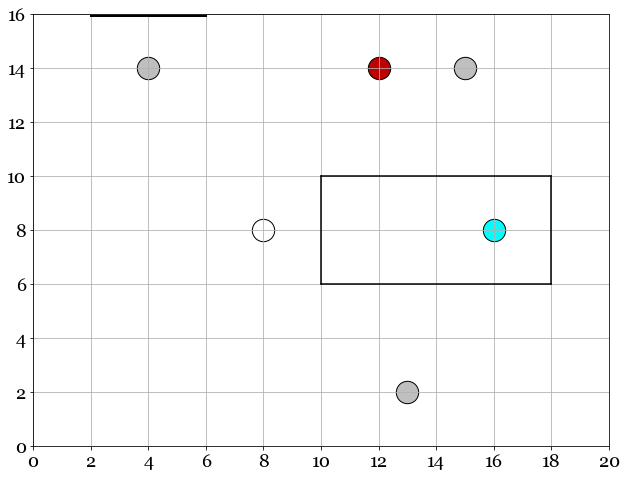

In [7]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.0,bottom=0, right=1.0, top=1.0, wspace=0.7, hspace=0.7)
plt.scatter(16,8,color=(0,1,1),s=500,edgecolor='k')
plt.scatter(15,14,color=(0.75,0.75,0.75),s=500,edgecolor='k')
plt.scatter(13,2,color=(0.75,0.75,0.75),s=500,edgecolor='k')
plt.scatter(4,14,color=(0.75,0.75,0.75),s=500,edgecolor='k')
plt.scatter(8,8,color=(1.00,1.00,1.00),s=500,edgecolor='k')
plt.scatter(12,14,color=(0.75,0.00,0.00),s=500,edgecolor='k')
plt.plot([10,18],[6,6],c='k')
plt.plot([10,18],[10,10],c='k')
plt.plot([10,10],[6,10],c='k')
plt.plot([18,18],[6,10],c='k')
plt.plot([2,6],[15.925,15.925],c='k',linewidth=2)
xticks = np.linspace(0,20,11,True);
yticks = np.linspace(0,16,9,True);
plt.xticks(xticks,labels=xticks.astype(int),fontsize=18,**csfont);
plt.yticks(yticks,labels=yticks.astype(int),fontsize=18,**csfont);
plt.axis((0,20,0,16))
plt.grid()
plt.savefig('../../assets/matplotlib/018_ICA_voice_seperation_1.png',dpi=300,bbox_inches="tight")

### Load the Timeseries needed for the analysis

In [125]:
left, sr = librosa.load(orientation_dir + 'voice_and_background_noise_orientation_left.wav',
                          mono=False,duration=15.0)
left_center, sr = librosa.load(orientation_dir + 'voice_and_background_noise_orientation_left_center.wav',
                          mono=False,duration=15.0)
center, sr = librosa.load(orientation_dir + 'voice_and_background_noise_orientation_center.wav',
                          mono=False,duration=15.0)
right_center, sr = librosa.load(orientation_dir + 'voice_and_background_noise_orientation_right_center.wav',
                          mono=False,duration=15.0)
right, sr = librosa.load(orientation_dir + 'voice_and_background_noise_orientation_right.wav',
                          mono=False,duration=15.0)
center_voice_only, sr = librosa.load(locations_dir_2 + 'voice_only_location_middle.wav',
                          mono=False,duration=15.0)

### Stack all signals together, so we have left and right channel at for each patient orietation

In [126]:
X = np.vstack((left,left_center,center,right_center,left)).T

### Plot one seconds worth to see the difference

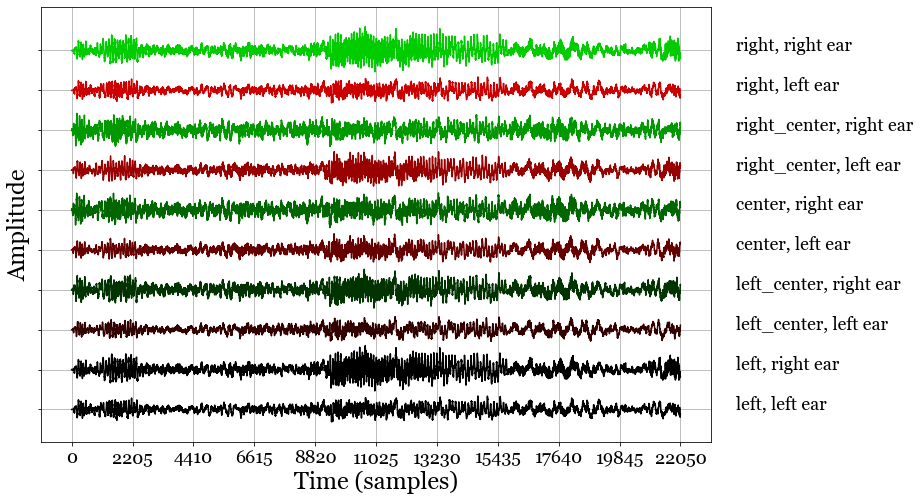

In [128]:
labels1 = ['left ear','right ear']
labels2 = ['left','left_center','center','right_center','right']

yticklabels = []
xticks = np.linspace(0,sr,11)
yticks = np.linspace(0,9,10)
for label2 in labels2:
    for label1 in labels1:
        label = label2 + ', ' + label1
        yticklabels.append(label)
plt.figure(figsize=(12,8))
for i in range(0,X.shape[1],2):
    plt.plot(X[:sr,i]+i,c=(i/X.shape[1],0,0))
    plt.plot(X[:sr,i+1]+i+1,c=(0,i/X.shape[1],0))
    plt.text(sr+2000,i,yticklabels[i],fontsize=18,**csfont);
    plt.text(sr+2000,i+1,yticklabels[i+1],fontsize=18,**csfont);
plt.xticks(xticks,labels=np.round(xticks,2).astype(int),fontsize=18,**csfont);
plt.yticks(yticks,labels=[],fontsize=18,**csfont);
plt.xlabel('Time (samples)',fontsize=24,**csfont);
plt.ylabel('Amplitude',fontsize=24,**csfont);
plt.grid()
plt.savefig('../../assets/matplotlib/018_ICA_voice_seperation_2.png',dpi=300,bbox_inches="tight")

### Run ICA

In [129]:
ica = FastICA(n_components=no_components)
SR = ica.fit_transform(X)
AR = ica.mixing_

### Examine Separation

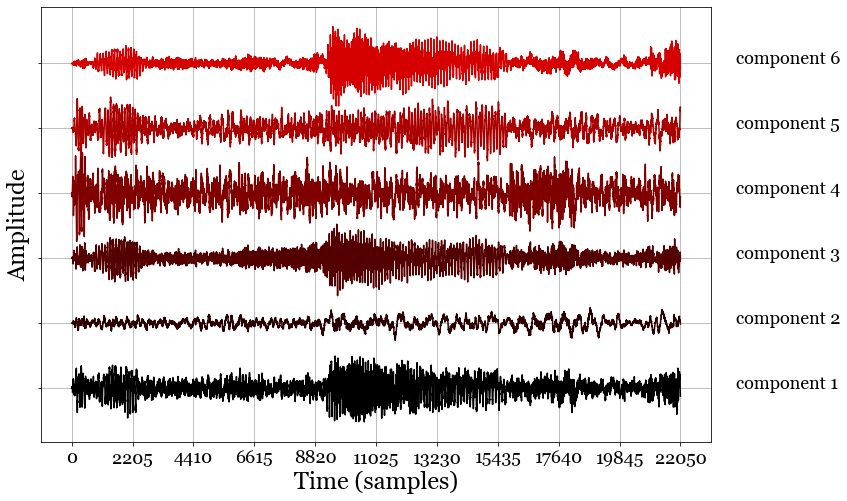

In [137]:
yticklabels = []
for i in range(no_components):
    yticklabels.append('component ' + str(i+1))
    xticks = np.linspace(0,sr,11)
    yticks = np.linspace(0,no_components-1,no_components)
plt.figure(figsize=(12,8))
for i in range(0,SR.shape[1]):
    ts = SR[:sr,i] * 100
    plt.plot(ts+i,c=(i/SR.shape[1],0,0))
    plt.text(sr+2000,i,yticklabels[i],fontsize=18,**csfont);
plt.xticks(xticks,labels=np.round(xticks,2).astype(int),fontsize=18,**csfont);
plt.yticks(yticks,labels=[],fontsize=18,**csfont);
plt.xlabel('Time (samples)',fontsize=24,**csfont);
plt.ylabel('Amplitude',fontsize=24,**csfont);
plt.grid()
plt.savefig('../../assets/matplotlib/018_ICA_voice_seperation_3.png',dpi=300,bbox_inches="tight")

### Component 1 Audio

In [149]:
sf.write('../../data/audio/ica/component1.wav', SR[:,0], sr, 'PCM_16')
ipd.Audio(SR[:,0], rate=sr)

### Component 2 Audio

In [150]:
sf.write('../../data/audio/ica/component1.wav', SR[:,1], sr, 'PCM_16')
ipd.Audio(SR[:,1], rate=sr)

### Component 3 Audio

In [151]:
sf.write('../../data/audio/ica/component2.wav', SR[:,2], sr, 'PCM_16')
ipd.Audio(SR[:,2], rate=sr)

### Component 4 Audio

In [152]:
sf.write('../../data/audio/ica/component3.wav', SR[:,3], sr, 'PCM_16')
ipd.Audio(SR[:,3], rate=sr)

### Component 5 Audio

In [153]:
sf.write('../../data/audio/ica/component4.wav', SR[:,4], sr, 'PCM_16')
ipd.Audio(SR[:,4], rate=sr)

### Component 6 Audio

In [154]:
sf.write('../../data/audio/ica/component5.wav', SR[:,5], sr, 'PCM_16')
ipd.Audio(SR[:,5], rate=sr)